In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_csv("ph_cleaned_data_oct_31.csv")
df.head()

embed  \
0  <iframe src="https://www.pornhub.com/embed/f4c...   
1  <iframe src="https://www.pornhub.com/embed/3ee...   
2  <iframe src="https://www.pornhub.com/embed/e5e...   
3  <iframe src="https://www.pornhub.com/embed/f8e...   
4  <iframe src="https://www.pornhub.com/embed/e32...   

                                          thubnail_1  \
0  https://di.phncdn.com/videos/200708/12/347/ori...   
1  https://di.phncdn.com/videos/200705/06/417/ori...   
2  https://di.phncdn.com/videos/200704/18/518/ori...   
3  https://di.phncdn.com/videos/200706/05/592/ori...   
4  https://di.phncdn.com/videos/201010/27/6991/or...   

                                         thumbnail_2  \
0  https://di.phncdn.com/videos/200708/12/347/ori...   
1  https://di.phncdn.com/videos/200705/06/417/ori...   
2  https://di.phncdn.com/videos/200704/18/518/ori...   
3  https://di.phncdn.com/videos/200706/05/592/ori...   
4  https://di.phncdn.com/videos/201010/27/6991/or...   

                                               title  \
0                  Heather brooke swallo from condom   
1                               HEATHER IN CHRISTMAS   
2                                Blowjob Instruction   
3                         heather brooke-talks dirty   
4  Blond slut loves a dick from her ass to her mouth   

                                                tags  \
0  ['ideepthroat.com', 'pornstar', 'swallow', 'bl...   
1  ['ideepthroat.com', 'fetish', 'blowjob', 'blon...   
2  ['ideepthroat.com', 'blowjob', 'pornstar', 'bl...   
3  ['ideepthroat.com', 'blowjob', 'blonde', 'big-...   
4  ['ass', 'anal', 'blowjob', 'suck', 'cum', 'cum...   

                                          categories           pornstars  \
0         ['Blowjob', 'Pornstar', 'Verified Models']  ['Heather Harmon']   
1  ['Blowjob', 'Fetish', 'Pornstar', 'Verified Mo...  ['Heather Harmon']   
2  ['Blonde', 'Blowjob', 'Pornstar', 'Threesome',...  ['Heather Harmon']   
3         ['Blowjob', 'Pornstar', 'Verified Models']  ['Heather Harmon']   
4  ['Blonde', 'Pornstar', 'Anal', 'Verified Models']  ['Heather Harmon']   

   duration    views   likes  dislikes  \
0        99  2655763  3168.0     479.0   
1       126   994411  1790.0     278.0   
2        86   845014   734.0     130.0   
3       110  3585116  3889.0     475.0   
4       180   489864   672.0     120.0   

                                         thumbnail_3  \
0  https://di.phncdn.com/videos/200708/12/347/ori...   
1  https://di.phncdn.com/videos/200705/06/417/ori...   
2  https://di.phncdn.com/videos/200704/18/518/ori...   
3  https://di.phncdn.com/videos/200706/05/592/ori...   
4  https://di.phncdn.com/videos/201010/27/6991/or...   

                                         thumbnail_4  
0  https://di.phncdn.com/videos/200708/12/347/ori...  
1  https://di.phncdn.com/videos/200705/06/417/ori...  
2  https://di.phncdn.com/videos/200704/18/518/ori...  
3  https://di.phncdn.com/videos/200706/05/592/ori...  
4  https://di.phncdn.com/videos/201010/27/6991/or...

In [3]:
df.columns

Index(['embed', 'thubnail_1', 'thumbnail_2', 'title', 'tags', 'categories',
       'pornstars', 'duration', 'views', 'likes', 'dislikes', 'thumbnail_3',
       'thumbnail_4'],
      dtype='object')

In [4]:
# Pornstars EDA

In [5]:
df["pornstars"]

0                         ['Heather Harmon']
1                         ['Heather Harmon']
2                         ['Heather Harmon']
3                         ['Heather Harmon']
4                         ['Heather Harmon']
                         ...                
588862                     ['Barbara Perez']
588863         ['Kayla Quinn', 'Lexi Belle']
588864    ['Brianna Love', 'Cassandra Cruz']
588865         ['Brooke Haven', 'Tory Lane']
588866       ['Charlie Laine', 'Jenna Haze']
Name: pornstars, Length: 588867, dtype: object

In [6]:
df[["pornstars"]].value_counts()

pornstars                                     
['Lelu Love']                                     4512
['Ezada Sinn']                                    1768
['Christian XXX']                                 1429
['Savannah Camgirl']                              1299
['Gina Gerson']                                   1082
                                                  ... 
['Elle Voneva', 'Jada Kai', 'Sam Shock']             1
['Elle Voneva', 'Jackie Knight']                     1
['Elle Voneva', 'Ember Snow', 'Jade Kush']           1
['Elle Ryan', 'Richelle Ryan', 'Wesley Pipes']       1
['チャド・レンガ', 'ルフスパルス']                                1
Length: 130512, dtype: int64

In [7]:
# Define "unique_pornstars" sorted by listings in videos and remove [] & ''
df["unique_pornstars"] = df["pornstars"].apply(lambda x: [entry
                                                          .replace("[", "")
                                                          .replace("]", "")
                                                          .replace("'", "")
                                                          .strip() for entry in x.split(",")])


# Create an empty dictionary counting unique pornstars in dataset
pornstar_counts = {}

# Iterate through all lists available in "unique_pornstars"
for pornstar_list in df["unique_pornstars"]:
    for pornstar in pornstar_list:
        if pornstar in pornstar_counts:
            pornstar_counts[pornstar] += 1
        else:
            pornstar_counts[pornstar] = 1

# Create DataFrame for unique pornstars
df_pornstar = pd.DataFrame(list(pornstar_counts.items()), 
                           columns = ["Pornstar", "Encounter"]).sort_values(by = "Encounter", ascending = False)

In [8]:
df_pornstar

Pornstar  Encounter
1631          Lelu Love       4520
1795       Mike Adriano       2674
1253      Christian XXX       2609
728           Mick Blue       1876
872            Sara Jay       1856
...                 ...        ...
5080       Nicki Lushus          1
10965   Rafael La Torre          1
5087       Connie Loren          1
5089   Angelique Ricard          1
18530       britney luv          1

[18531 rows x 2 columns]

In [9]:
# Display all rows
pd.set_option('display.max_rows', None)

In [10]:
# Display all pornstars encountered 400+ times in a video
df_pornstar_encounter_400 = df_pornstar[df_pornstar["Encounter"] >= 400]
df_pornstar_encounter_400

Pornstar  Encounter
1631             Lelu Love       4520
1795          Mike Adriano       2674
1253         Christian XXX       2609
728              Mick Blue       1876
872               Sara Jay       1856
12437           Ezada Sinn       1772
3096           Gina Gerson       1702
5193             Porno Dan       1682
972          Johnny Castle       1478
14253           Tommy Wood       1472
515         Manuel Ferrara       1448
14914        Ms Paris Rose       1446
127             James Deen       1424
668            Nacho Vidal       1417
7647            Chad White       1368
1560            Riley Reid       1336
47             Johnny Sins       1334
11577     Savannah Camgirl       1299
873              Eric John       1297
927              Julia Ann       1243
2861             Penny Pax       1211
15433         Martin Spell       1174
10468          Alex Legend       1163
1546         Xander Corvus       1149
6665        Cherie Deville       1137
898        Angelina Castro       1130
10434        Isiah Maxwell       1126
1524           Ramon Nomar       1125
1270            George Uhl       1112
1229         Britney Amber       1110
2864        Alexis Crystal       1108
9153             Alix Lynx       1105
479              Asa Akira       1088
9167         Abella Danger       1082
9218          Sean Lawless       1076
878             Keiran Lee       1071
6893           Abigail Mac       1059
911           Charles Dera       1049
7042       Adriana Chechik       1049
1810          Dani Daniels       1045
3796           Cherry Kiss       1042
9261       Anna Bell Peaks       1037
17152         Arya Grander       1031
1626        Prince Yahshua       1014
1844           Tony Rubino       1011
12907           Katty West       1003
1348          Natasha Nice        987
1319           Seth Gamble        984
954          Chris Strokes        972
470             Tommy Gunn        946
12262       Nathan Bronson        933
1545        Danny Mountain        918
14148           Msnovember        918
20                   Mugur        913
3851           Tyler Nixon        913
9021          Kayla Kayden        904
961          Charlee Chase        895
6363          Pascal White        894
8591          Kristof Cale        892
14698          Brad Newman        892
8215            Rome Major        892
14115          Perla Lopez        886
9362       Lauren Phillips        876
814               Lisa Ann        874
1199          London Keyes        872
1047        Jennifer White        872
9195            Kimber Lee        866
1562         Bruce Venture        847
13392          Sofie Marie        846
7032          Angela White        840
3374          Brick Danger        838
1183        Jessica Jaymes        837
3026           Anissa Kate        836
12417           Logan Long        836
741        Michael Stefano        824
10640            Elsa Jean        806
14234            Will Tile        805
3250           Leya Falcon        803
1684               Danny D        800
696          Erik Everhard        791
732             Lady Sonia        789
7565             Van Wylde        787
145         Derrick Pierce        782
13604        Tiffany Tatum        782
7209            Cory Chase        780
4081       Valentina Nappi        780
15956             Tru Kait        780
3321          Amirah Adara        778
1050           John Strong        773
12348            Lena Paul        772
10850          Peter Green        769
10472         Stacey Saran        764
967           Alison Tyler        763
2969          Maggie Green        757
11661          Jax Slayher        756
1261        Nicole Aniston        744
1077          India Summer        740
2208          Aaliyah Love        740
13592           Paris Rose        739
2517           Alexis Fawx        734
90          Marco Banderas        721
757                  j-mac        717
2291           Angel Wicky        716
3054      Carmen Valentina        712
3460          Tony Profane  

In [11]:
# Cumulative views for each pornstar based on videos (titles) listing pornstars

# Group DataFrame by unique pornstars and calculate sum of views for each pornstar
cumulative_views_by_pornstar = df.explode("unique_pornstars").groupby("unique_pornstars")["views"].sum().reset_index()

# Sort results by cumulative view sum of views
cumulative_views_by_pornstar = cumulative_views_by_pornstar.sort_values(by = "views", ascending = False)

In [12]:
cumulative_views_by_pornstar

unique_pornstars       views
15287                      Tony Profane  3479803321
427                          Alex Adams  2678251696
7558                        Johnny Sins  2633491585
6761                         James Deen  2036790044
106                       Abella Danger  1879326027
13018                        Riley Reid  1751509506
9022                       Lana Rhoades  1746525384
16009                     Xander Corvus  1658608474
15488                       Tyler Nixon  1646426848
10816                       Mia Khalifa  1557155256
15290                       Tony Rubino  1461040437
10928                         Mick Blue  1458703278
7541                      Johnny Castle  1423053290
8289                         Keiran Lee  1350431887
213                     Adriana Chechik  1250943929
8857                         Kyle Mason  1237151711
13815                      Sean Lawless  1228080334
10403                     Mark Rockwell  1207534703
10966                      Mike Adriano  1146021278
10416                     Markus Dupree  1145653642
4284                        Danika Mori  1143497300
7653                Jordi El Nino Polla  1116375195
2726                      Bruce Venture  1094762589
1180                       Angela White  1079847582
10220                    Manuel Ferrara  1056538366
5334                          Eva Elfie  1022406438
7703               Juan El Caballo Loco   986440381
4302                            Danny D   952687029
9304                            LeoLulu   951720521
3302                         Chad White   939198700
3918                         Cory Chase   923901924
3824                       Codey Steele   922577995
9920                        Luke Longly   905188245
5158                       Emily Willis   891461277
12958                     Ricky Johnson   870584294
6960                        Jax Slayher   868878778
9701                       Logan Pierce   855080489
10825                       Mia Malkova   840586075
15584                         Van Wylde   837592797
6468                      Isiah Maxwell   837390446
2817                              CHUCK   836559249
576                         Alexis Fawx   818360684
12165                         Owen Gray   802353322
17090                             j-mac   799643321
13895                       Seth Gamble   790009132
2436                        Brandi Love   787632583
4311                     Danny Mountain   782836642
9268                          Lena Paul   779421824
13044                         Rion King   777763996
5835                     Gina Valentina   777422080
14545                        Steve Mori   777266210
9697                         Logan Long   759752253
6935                          Jason Luv   749369900
8645                         Kissa Sins   728811726
440                              Alex D   726192796
15241                        Tommy Gunn   708591275
3587                      Chris Strokes   692263640
1799                       Autumn Falls   690724029
3347                       Charles Dera   686951006
3444                     Cherie Deville   676436734
2591                      Britney Amber   673716891
10058                    Madeincanarias   670174957
1760                        August Ames   663303416
6926                        Jason Brown   655637413
2568                       Brick Danger   653563188
13076                         Rob Piper   646150247
5092                          Elsa Jean   640260553
1813                         Ava Addams   637472778
8579                      Kimmy Granger   632225964
12689                       Ramon Nomar   629914321
4703                     Dillion Harper   629172169
4185                         Damon Dice   618856880
13313                       Ryan Mclane   617578413
7072                      Jean Val Jean   598787508
9258                          Lela Star   597257304
9601                           Lisa Ann   587891295
11789              

In [13]:
# Tags analysis

In [14]:
# Define "unique_tags" sorted by listings in videos and remove [] & ''
df["unique_tags"] = df["tags"].apply(lambda x: [entry
                                                .replace("[", "")
                                                .replace("]", "")
                                                .replace("'", "")
                                                .strip() for entry in x.split(",")])

# Create an empty dictionary counting unique tags
tag_counts = {}

# Iterate through all lists available in "unique_tags"
for tag_list in df["unique_tags"]:
    for tag in tag_list:
        if tag in tag_counts:
            tag_counts[tag] += 1
        else:
            tag_counts[tag] = 1

# Create DataFrame for unique tags
df_tag = pd.DataFrame(list(tag_counts.items()), 
                           columns = ["Tag", "Encounter"]).sort_values(by = "Encounter", ascending = False)

In [15]:
# Display all tags tagged in a video (restricted to 400, since displaying all would end up in an interruption of the kernel)
tag_encounter_400 = df_tag[df_tag["Encounter"] >= 400]
tag_encounter_400

Tag  Encounter
3                    blowjob     179316
264                big-boobs     137266
6                   big-tits     136029
78                  brunette     122723
8                     blonde     113702
595                 big-cock     110248
36              natural-tits     100333
9                    cumshot      92025
40                  hardcore      89784
122                   petite      80761
11                  big-dick      74659
93                small-tits      70760
69                   big-ass      68294
158                     milf      67406
142               doggystyle      65158
15                      anal      61573
48                      babe      58716
364                     butt      58713
277                      mom      56939
1313                ass-fuck      55994
10                    facial      51248
159                   mother      50906
28                       pov      50884
27                deepthroat      50847
270            pussy-licking      50814
814            point-of-view      49693
673               masturbate      48467
1                   pornstar      46216
87                      teen      46210
649                  cowgirl      45559
1618                    kink      44659
1007                teenager      42350
59                   amateur      41929
88                    orgasm      40080
137                fingering      37756
868                    young      37509
74              masturbation      37207
200              interracial      36760
105                   tattoo      36241
7                  fake-tits      36229
1401            shaved-pussy      35589
52                     busty      35427
1314         reverse-cowgirl      35048
145                    rough      34821
738               missionary      34224
95                    skinny      33842
1346              adult-toys      32556
12                 threesome      32393
154                      bbc      31639
139                  redhead      30629
30                   lesbian      30175
131                   latina      29894
94               bubble-butt      29732
14                       ass      28567
705                    3some      28280
279                 lingerie      28080
117                   shaved      27140
152                    black      26941
111                  handjob      26251
4                     fetish      25002
707             cock-sucking      24503
370                 creampie      23348
22                   reality      23177
161                huge-tits      22980
178                stockings      22543
1530            cum-in-mouth      22098
51                    riding      20932
160                    latin      20920
32                     pussy      20725
60                  homemade      19435
153                    ebony      19282
25                     dildo      19261
39                      solo      19253
108                    asian      18968
151                    czech      18630
126              doggy-style      18288
46                      tits      18030
367              pornhub.com      17988
73                    public      17029
1834                      hd      17012
830                  rimming      15710
198                     oral      15281
575             girl-on-girl      14842
216                  british      14749
574             pussy-eating      14485
193                  kissing      14481
311                   chubby      14294
5                        cum      14259
26                      toys      14246
507                squirting      14219
3005                    pawg      14196
190                      sex      14044
314                  fucking      13634
113                 european      13579
730               high-heels      13481
5585        big-natural-tits      13096
316                   mature      12799
1312                bareback      12717
648                    booty      12399
399                  outs

In [ ]:
"""
Comment on code potentially one time (pornstars). tags and categories have just minor adjustments (rename).
"""

In [16]:
# Cumulative views for each tag based on titles listing tags

# Group DataFrame by unique tag and calculate sum of views for each tag
cumulative_views_by_tags = df.explode("unique_tags").groupby("unique_tags")["views"].sum().reset_index()

# Sort results by cumulative view sum of views
cumulative_views_by_tags = cumulative_views_by_tags.sort_values(by = "views", ascending = False)

# Limit to Top 400 tags (adding more leading towards kernel interruption)
cumulative_views_by_tags = cumulative_views_by_tags.head(400)

In [17]:
# Categories analysis

In [18]:
# Define "unique_tags" sorted by listings in videos and remove [] & ''
df["unique_categories"] = df["categories"].apply(lambda x: [entry
                                                            .replace("[", "")
                                                            .replace("]", "")
                                                            .replace("'", "")
                                                            .strip() for entry in x.split(",")])

# Create an empty dictionary counting unique categories
category_counts = {}

# Iterate through all lists available in "unique_categories"
for cat_list in df["unique_categories"]:
    for cat in cat_list:
        if cat in category_counts:
            category_counts[cat] += 1
        else:
            category_counts[cat] = 1

# Create DataFrame for unique categories
df_cat = pd.DataFrame(list(category_counts.items()), 
                           columns = ["Category", "Encounter"]).sort_values(by = "Encounter", ascending = False)

In [19]:
df_cat

Category  Encounter
1                 Pornstar     560945
8                 Big Tits     203455
15                Hardcore     187543
0                  Blowjob     178479
20                Brunette     168046
35                    Babe     163292
9                 Big Dick     156220
2          Verified Models     140877
4                   Blonde     135690
30                 Big Ass     135139
23              Teen (18+)     117045
27                 Cumshot     104794
29                    MILF      97578
25              Small Tits      97499
18                 Amateur      86304
6                     Anal      81319
10                     POV      77004
3                   Fetish      72355
17             Solo Female      71561
21            Masturbation      66425
45           Pussy Licking      59536
22                    Toys      58591
5                Threesome      50678
11                 Lesbian      50361
13               Rough Sex      48878
16               Exclusive      48362
34             Interracial      47297
7                  Reality      42731
101          Female Orgasm      39748
37                 Handjob      34427
97          Tattooed Women      33251
81            Step Fantasy      32784
31                Creampie      32677
26                  Latina      32222
119                  60FPS      30765
61                     Gay      30696
38                Red Head      27985
28                   Ebony      26846
19                  Public      23232
33               Role Play      21825
24                   Asian      20603
60       Verified Amateurs      18893
91                Bareback      17128
108            Transgender      16398
54                  Squirt      15573
69         Old/Young (18+)      14541
32                     BBW      13729
73                    Feet      13711
104               Romantic      13572
49      Double Penetration      13417
43                  Mature      12358
70               Fingering      12158
55                 British      12002
63                     FFM      11746
84                  Muscle      10738
82                   Hunks      10613
39             Compilation      10465
12                    Orgy      10360
107                  Czech      10126
95                 Russian       9797
14                    Euro       9795
57                 Massage       9612
96            Muscular Men       9128
51                  Webcam       8610
52       Behind The Scenes       8564
99      Popular With Women       8175
56                 Bondage       7996
66             Twink (18+)       7930
71                 Casting       7840
44                Gangbang       7563
122        Virtual Reality       7450
92                    Jock       6933
136         Vertical Video       6143
72               Celebrity       6111
80               Solo Male       6051
79                 Cosplay       5929
68           College (18+)       5879
100                 German       5673
83                     FMM       5512
112             Scissoring       5384
90                   Daddy       5275
116           Tattooed Men       5001
124                     3D       4767
64                 Italian       4753
123                   180°       4504
67                 Pissing       4353
106                Cuckold       4228
121         Trans With Guy       4020
50                  French       3935
85               Brazilian       3932
111                  Uncut       3714
118             Solo Trans       3523
48            School (18+)       3474
53                   Party       3428
41                 Fisting       3362
46              Striptease       3359
58                 Vintage       3110
86                Japanese       3003
131       Verified Couples       2850
102                  Group       2821
89                 Smoking       2788
114               Strap On       2774
87                  Latino       2334
78                  Parody       2323
47                 Bukkake  

In [20]:
# Cumulative views for each category based on titles listing category

#Group DataFrame by unique category and calculate sum of views for each category
cumulative_views_by_cat = df.explode("unique_categories").groupby("unique_categories")["views"].sum().reset_index()

# Sort results by cumulative view sum of views
cumulative_views_by_cat = cumulative_views_by_cat.sort_values(by = "views", ascending = False)

In [21]:
cumulative_views_by_cat

unique_categories         views
92                Pornstar  173740037771
17                Big Tits   69135094985
63                Hardcore   68135545531
16                Big Dick   60231460398
21                 Blowjob   54398593328
25                Brunette   53847878743
10                    Babe   51604996763
116             Teen (18+)   51469432517
15                 Big Ass   45889232543
91      Popular With Women   45598737807
20                  Blonde   40283270372
130        Verified Models   39276525913
86                     POV   33632948172
110           Step Fantasy   31791849241
104             Small Tits   31114919257
76                    MILF   30851298202
38                 Cumshot   30628800408
5                  Amateur   27468491709
6                     Anal   21289537702
95                 Reality   21038100669
119              Threesome   20071539752
94           Pussy Licking   17560859108
36                Creampie   17470924502
99               Rough Sex   17251528917
47               Exclusive   15102265266
68             Interracial   14033106778
75                 Lesbian   13095538015
51           Female Orgasm   11349997496
73                  Latina   10912538771
32         Closed Captions    9664326638
52                  Fetish    9309208402
4                    60FPS    9216649543
97               Role Play    7986722435
45                   Ebony    7840494737
120                   Toys    7772715714
78            Masturbation    7668123377
93                  Public    7395436266
62                 Handjob    7309850330
96                Red Head    7236128901
109                 Squirt    6534483165
115         Tattooed Women    5663232019
106            Solo Female    5480419000
128      Verified Amateurs    5388575861
98                Romantic    5267818400
8                    Asian    5112864060
85                    Orgy    4883056091
48                     FFM    4428483621
84         Old/Young (18+)    3812897626
44      Double Penetration    3713654230
77                 Massage    3710682396
34             Compilation    3485632488
58                     Gay    3279092897
57                Gangbang    2841245787
100                Russian    2642313751
53               Fingering    2624814897
124            Transgender    2615907883
28                 Casting    2614425131
82            Muscular Men    2508420906
33           College (18+)    2439450670
12                Bareback    2408607025
129       Verified Couples    2354784314
39                   Czech    2040361885
24                 British    2018250993
79                  Mature    1982970625
103             Scissoring    1910572385
7                     Arab    1845518877
46                    Euro    1655664267
9                      BBW    1493844901
89                   Party    1446622767
22                 Bondage    1424551959
65                   Hunks    1395020952
102           School (18+)    1354402180
49                     FMM    1353729853
50                    Feet    1319572028
29               Celebrity    1292004658
70                Japanese    1276611263
135                 Webcam    1246160138
81                  Muscle    1226559860
35                 Cosplay    1198062287
59                  German    1172129569
14       Behind The Scenes    1102409859
55                  French    1078151341
69                 Italian    1019990744
11        Babysitter (18+)     962792862
37                 Cuckold     830525119
125            Twink (18+)     800219845
131         Vertical Video     779722430
23               Brazilian     727353973
71                    Jock     709294113
113             Striptease     705354285
123         Trans With Guy     703714816
18           Bisexual Male     667821933
112               Strap On     647842879
54                 Fisting     611342289
122        Trans With Girl     605977789
90                 Pissing     582697532
67             Interactive     5

In [33]:
"""
Gegenüberstellung von gegensätzlichen Kategorien (bspw. big-ass vs big-tits, lesbian vs gay etc.) oder Ländern ...
"""

'\nGegenüberstellung von gegensätzlichen Kategorien (bspw. big-ass vs big-tits, lesbian vs gay etc.)\n'

In [34]:
# Merge df_cat and cumulative_views_by_cat on the "Category" column
df_cat_encounter_views = pd.merge(df_cat, 
                                  cumulative_views_by_cat, 
                                  left_on = "Category", 
                                  right_on = "unique_categories", 
                                  how = "left")

# Drop the redundant "unique_categories" column
df_cat_encounter_views = df_cat_encounter_views.drop(columns = ["unique_categories"])
df_cat_encounter_views = df_cat_encounter_views.rename(columns = {"views": "Views"})

In [35]:
df_cat_encounter_views.head(50)

Category  Encounter         Views
0             Pornstar     560945  173740037771
1             Big Tits     203455   69135094985
2             Hardcore     187543   68135545531
3              Blowjob     178479   54398593328
4             Brunette     168046   53847878743
5                 Babe     163292   51604996763
6             Big Dick     156220   60231460398
7      Verified Models     140877   39276525913
8               Blonde     135690   40283270372
9              Big Ass     135139   45889232543
10          Teen (18+)     117045   51469432517
11             Cumshot     104794   30628800408
12                MILF      97578   30851298202
13          Small Tits      97499   31114919257
14             Amateur      86304   27468491709
15                Anal      81319   21289537702
16                 POV      77004   33632948172
17              Fetish      72355    9309208402
18         Solo Female      71561    5480419000
19        Masturbation      66425    7668123377
20       Pussy Licking      59536   17560859108
21                Toys      58591    7772715714
22           Threesome      50678   20071539752
23             Lesbian      50361   13095538015
24           Rough Sex      48878   17251528917
25           Exclusive      48362   15102265266
26         Interracial      47297   14033106778
27             Reality      42731   21038100669
28       Female Orgasm      39748   11349997496
29             Handjob      34427    7309850330
30      Tattooed Women      33251    5663232019
31        Step Fantasy      32784   31791849241
32            Creampie      32677   17470924502
33              Latina      32222   10912538771
34               60FPS      30765    9216649543
35                 Gay      30696    3279092897
36            Red Head      27985    7236128901
37               Ebony      26846    7840494737
38              Public      23232    7395436266
39           Role Play      21825    7986722435
40               Asian      20603    5112864060
41   Verified Amateurs      18893    5388575861
42            Bareback      17128    2408607025
43         Transgender      16398    2615907883
44              Squirt      15573    6534483165
45     Old/Young (18+)      14541    3812897626
46                 BBW      13729    1493844901
47                Feet      13711    1319572028
48            Romantic      13572    5267818400
49  Double Penetration      13417    3713654230

In [36]:
# Examine opposing categories

In [50]:
# Define helper function displaying comparison plots

def plot_comparison_by_encounter(data_frame, title):
    plt.figure(figsize = (6, 4))
    ax = sns.barplot(x = "Category", y = "Encounter", data = data_frame, palette = "Set1")
    ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x)))
    plt.title(title)
    
    # Add distribution in percent on top of the bars
    for p in ax.patches:
        percentage = "{:.1f}%".format(100 * p.get_height() / data_frame["Encounter"].sum())
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        ax.text(x, y, percentage, ha = "center", va = "bottom")

    plt.tight_layout()
    plt.show()
    
def plot_comparison_by_views(data_frame, title):
    plt.figure(figsize = (6, 4))
    ax = sns.barplot(x = "Category", y = "Views", data = data_frame, palette = "Set1")
    ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x)))
    plt.title(title)
    
    # Add distribution in percent on top of the bars
    for p in ax.patches:
        percentage = "{:.1f}%".format(100 * p.get_height() / data_frame["Views"].sum())
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        ax.text(x, y, percentage, ha = "center", va = "bottom")

    plt.tight_layout()
    plt.show()

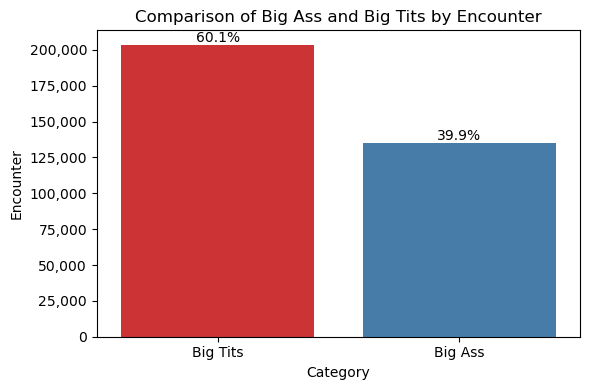

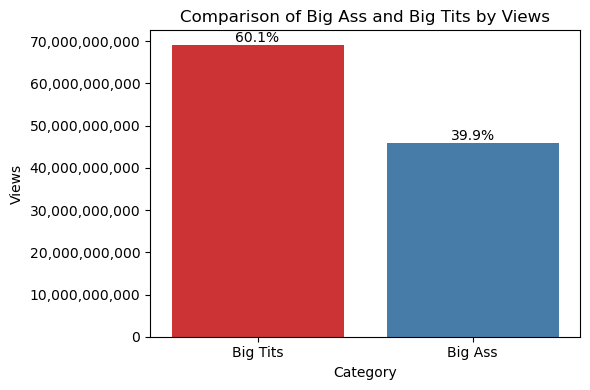

In [51]:
df_big_ass_tits = df_cat_encounter_views[df_cat_encounter_views["Category"].isin(["Big Ass", "Big Tits"])]

plot_comparison_by_encounter(df_big_ass_tits, "Comparison of Big Ass and Big Tits by Encounter")
plot_comparison_by_views(df_big_ass_tits, "Comparison of Big Ass and Big Tits by Views")

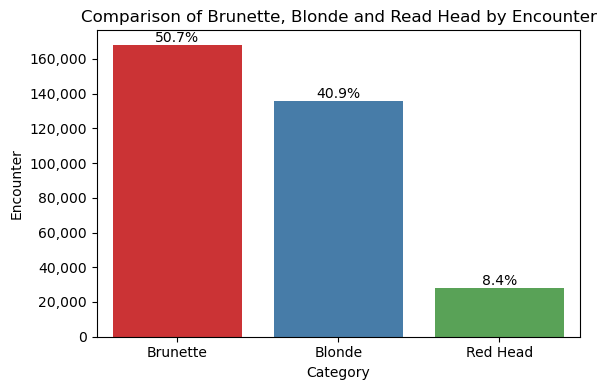

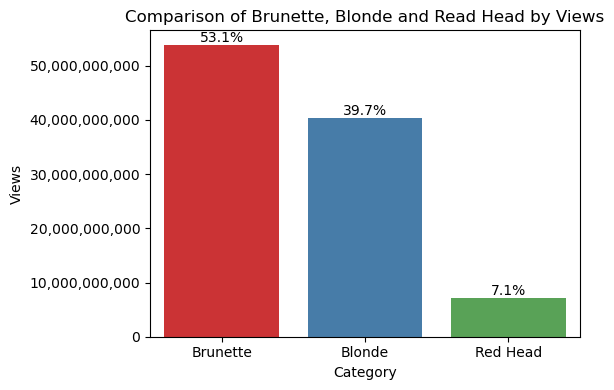

In [52]:
df_brunette_blonde_redhead = df_cat_encounter_views[df_cat_encounter_views["Category"].isin(["Brunette", "Blonde", "Red Head"])]

plot_comparison_by_encounter(df_brunette_blonde_redhead, "Comparison of Brunette, Blonde and Read Head by Encounter")
plot_comparison_by_views(df_brunette_blonde_redhead, "Comparison of Brunette, Blonde and Read Head by Views")

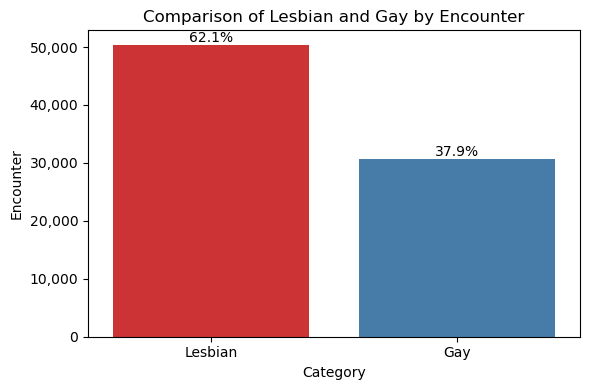

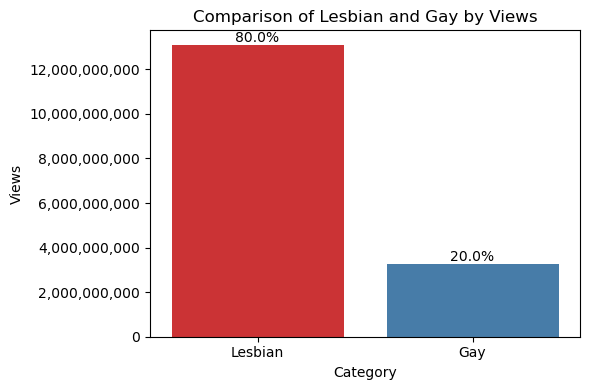

In [53]:
df_lesbian_gay = df_cat_encounter_views[df_cat_encounter_views["Category"].isin(["Lesbian", "Gay"])]

plot_comparison_by_encounter(df_lesbian_gay, "Comparison of Lesbian and Gay by Encounter")
plot_comparison_by_views(df_lesbian_gay, "Comparison of Lesbian and Gay by Views")

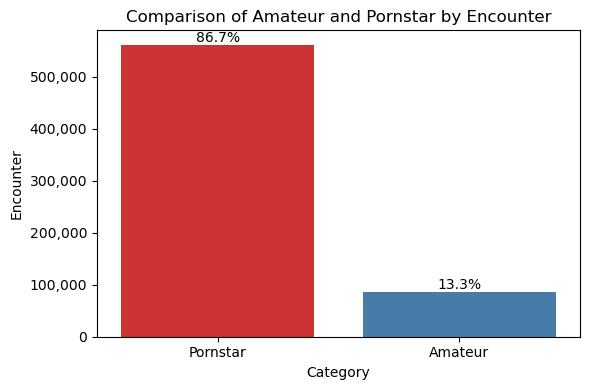

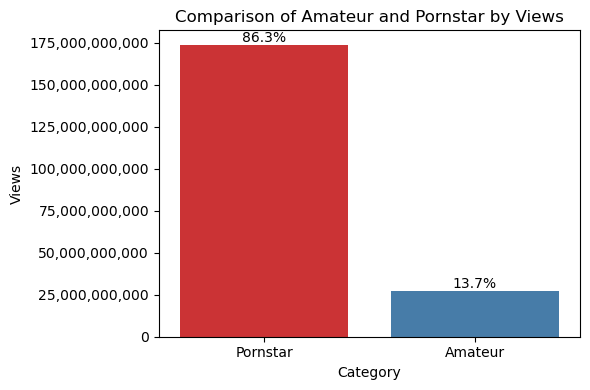

In [54]:
df_amateur_star = df_cat_encounter_views[df_cat_encounter_views["Category"].isin(["Amateur", "Pornstar"])]

plot_comparison_by_encounter(df_amateur_star, "Comparison of Amateur and Pornstar by Encounter")
plot_comparison_by_views(df_amateur_star, "Comparison of Amateur and Pornstar by Views")

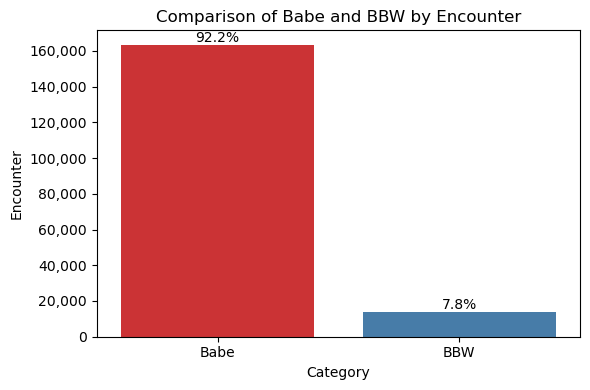

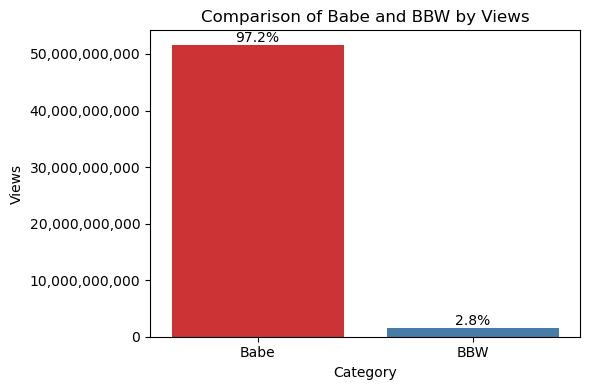

In [55]:
df_babe_bbw = df_cat_encounter_views[df_cat_encounter_views["Category"].isin(["Babe", "BBW"])]

plot_comparison_by_encounter(df_babe_bbw, "Comparison of Babe and BBW by Encounter")
plot_comparison_by_views(df_babe_bbw, "Comparison of Babe and BBW by Views")

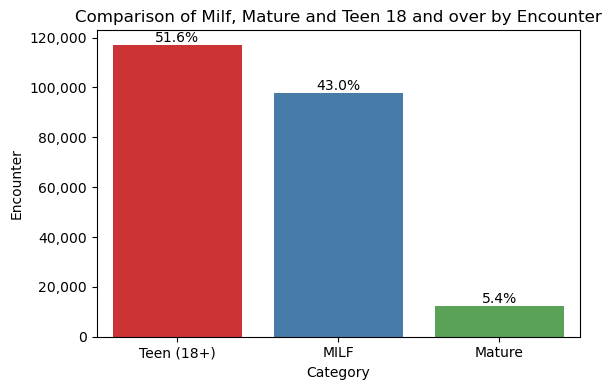

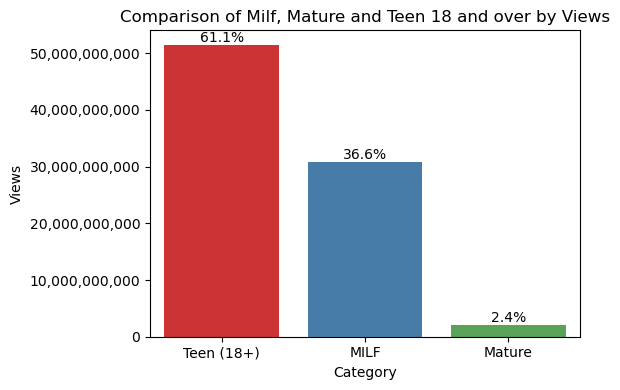

In [62]:
df_age = df_cat_encounter_views[df_cat_encounter_views["Category"].isin(["MILF", "Mature", "Teen (18+)"])]

plot_comparison_by_encounter(df_age, "Comparison of Milf, Mature and Teen 18 and over by Encounter")
plot_comparison_by_views(df_age, "Comparison of Milf, Mature and Teen 18 and over by Views")

In [56]:
# Examine categories by nationalities

In [57]:
df_cat_encounter_views

Category  Encounter         Views
0                 Pornstar     560945  173740037771
1                 Big Tits     203455   69135094985
2                 Hardcore     187543   68135545531
3                  Blowjob     178479   54398593328
4                 Brunette     168046   53847878743
5                     Babe     163292   51604996763
6                 Big Dick     156220   60231460398
7          Verified Models     140877   39276525913
8                   Blonde     135690   40283270372
9                  Big Ass     135139   45889232543
10              Teen (18+)     117045   51469432517
11                 Cumshot     104794   30628800408
12                    MILF      97578   30851298202
13              Small Tits      97499   31114919257
14                 Amateur      86304   27468491709
15                    Anal      81319   21289537702
16                     POV      77004   33632948172
17                  Fetish      72355    9309208402
18             Solo Female      71561    5480419000
19            Masturbation      66425    7668123377
20           Pussy Licking      59536   17560859108
21                    Toys      58591    7772715714
22               Threesome      50678   20071539752
23                 Lesbian      50361   13095538015
24               Rough Sex      48878   17251528917
25               Exclusive      48362   15102265266
26             Interracial      47297   14033106778
27                 Reality      42731   21038100669
28           Female Orgasm      39748   11349997496
29                 Handjob      34427    7309850330
30          Tattooed Women      33251    5663232019
31            Step Fantasy      32784   31791849241
32                Creampie      32677   17470924502
33                  Latina      32222   10912538771
34                   60FPS      30765    9216649543
35                     Gay      30696    3279092897
36                Red Head      27985    7236128901
37                   Ebony      26846    7840494737
38                  Public      23232    7395436266
39               Role Play      21825    7986722435
40                   Asian      20603    5112864060
41       Verified Amateurs      18893    5388575861
42                Bareback      17128    2408607025
43             Transgender      16398    2615907883
44                  Squirt      15573    6534483165
45         Old/Young (18+)      14541    3812897626
46                     BBW      13729    1493844901
47                    Feet      13711    1319572028
48                Romantic      13572    5267818400
49      Double Penetration      13417    3713654230
50                  Mature      12358    1982970625
51               Fingering      12158    2624814897
52                 British      12002    2018250993
53                     FFM      11746    4428483621
54                  Muscle      10738    1226559860
55                   Hunks      10613    1395020952
56             Compilation      10465    3485632488
57                    Orgy      10360    4883056091
58                   Czech      10126    2040361885
59                 Russian       9797    2642313751
60                    Euro       9795    1655664267
61                 Massage       9612    3710682396
62            Muscular Men       9128    2508420906
63                  Webcam       8610    1246160138
64       Behind The Scenes       8564    1102409859
65      Popular With Women       8175   45598737807
66                 Bondage       7996    1424551959
67             Twink (18+)       7930     800219845
68                 Casting       7840    2614425131
69                Gangbang       7563    2841245787
70         Virtual Reality       7450     294074416
71                    Jock       6933     709294113
72          Vertical Video       6143     779722430
73               Celebrity       6111    1292004658
74               Solo Male       6051     192739749
75                 Cosplay       5929    1198062287
76           C

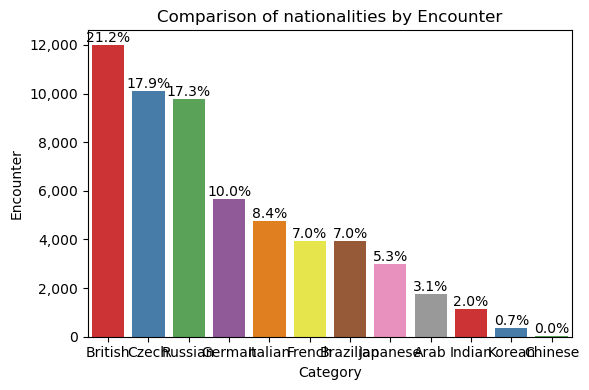

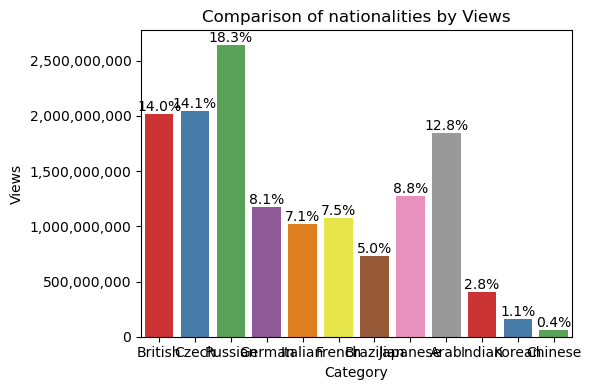

In [60]:
df_nationalities = df_cat_encounter_views[df_cat_encounter_views["Category"].isin(["British", "Czech", "Russian", "German", "Italian", "French", "Brazilian", "Japanese", "Arab", "Indian", "Korean", "Chinese"])]

plot_comparison_by_encounter(df_nationalities, "Comparison of nationalities by Encounter")
plot_comparison_by_views(df_nationalities, "Comparison of nationalities by Views")

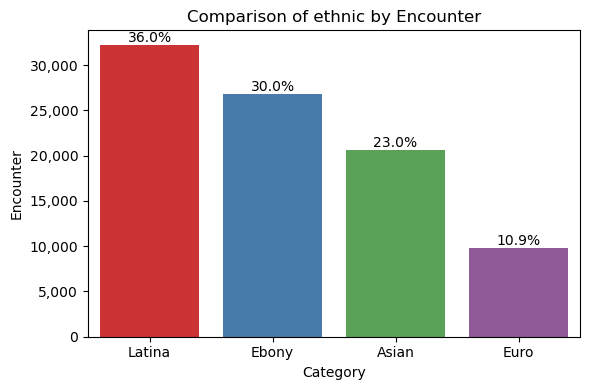

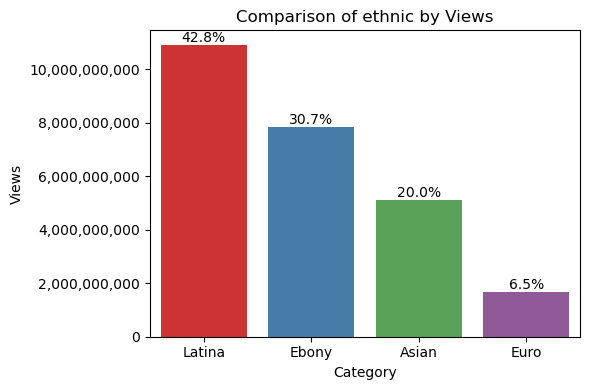

In [64]:
df_ethnic = df_cat_encounter_views[df_cat_encounter_views["Category"].isin(["Asian", "Euro", "Ebony", "Latina"])]

plot_comparison_by_encounter(df_ethnic, "Comparison of ethnic by Encounter")
plot_comparison_by_views(df_ethnic, "Comparison of ethnic by Views")

In [33]:
# Plot the results of the three columns examined

In [23]:
df_unique_content = df[["unique_pornstars", "unique_tags", "unique_categories"]]

In [24]:
# Now: examine the Top 40 based on encounters in dataset (40 because of aesthetic reasons)

In [25]:
# Helper function to extract Top n entries and create a barchart (version_1)
def get_top_n_entries_by_encounter_and_create_barchart_v_1(column, n = 40):
    flat_list = [item for sublist in column for item in sublist]
    value_counts = pd.Series(flat_list).value_counts().head(n)
    
    plt.figure(figsize = (12, 6))
    ax = sns.barplot(x = value_counts.values, y = value_counts.index, palette = "viridis")
    ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x))) # Delimiter will increase readability
    plt.title(f"Top {n} in {column.name} based on listing in titles (videos)")
    plt.xlabel("Count")
    plt.ylabel("Entry")
    
    plt.tight_layout()
    plt.show()
    
# Helper function with axes switched (version_2)
def get_top_n_entries_by_encounter_and_create_barchart_v_2(column, n = 40):
    flat_list = [item for sublist in column for item in sublist]
    value_counts = pd.Series(flat_list).value_counts().head(n)
    
    plt.figure(figsize = (12, 6))
    ax = sns.barplot(x = value_counts.index, y = value_counts.values, palette = "viridis")
    ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x)))
    plt.title(f"Top {n} in {column.name} based on listing in titles (videos)")
    plt.xticks(rotation = 90)
    plt.xlabel("Entry")
    plt.ylabel("Count")
    
    plt.tight_layout()
    plt.show()

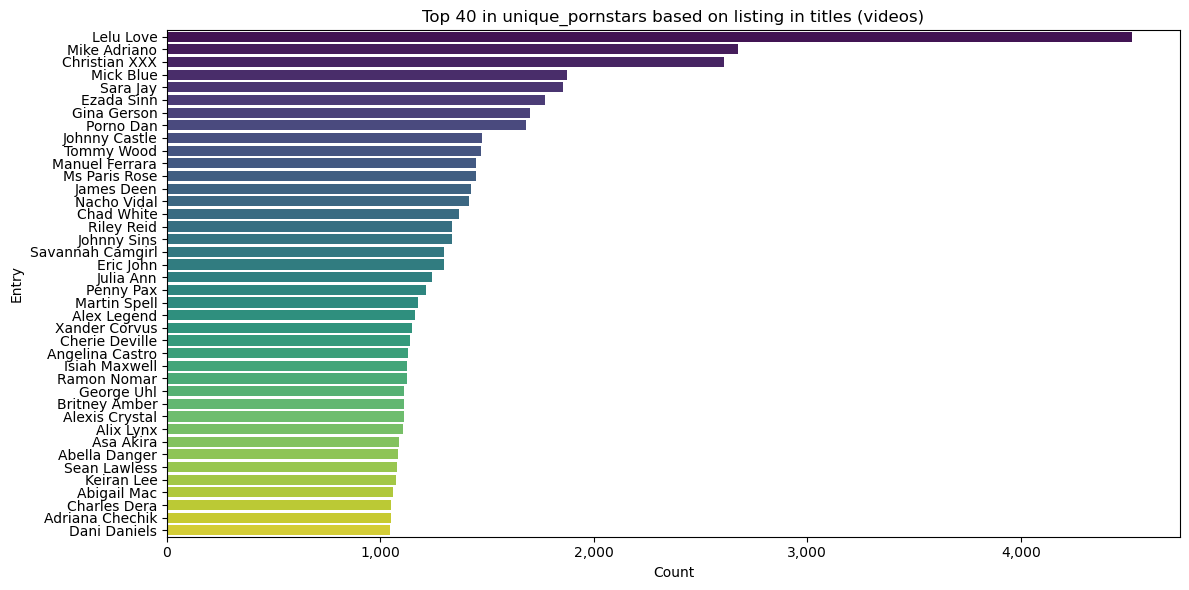

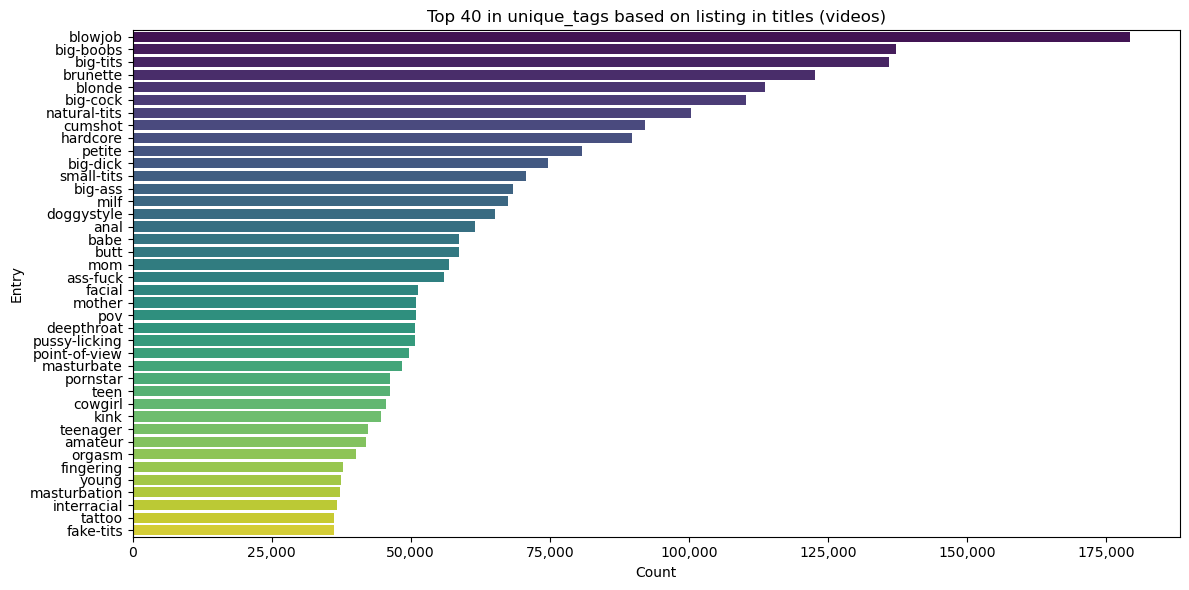

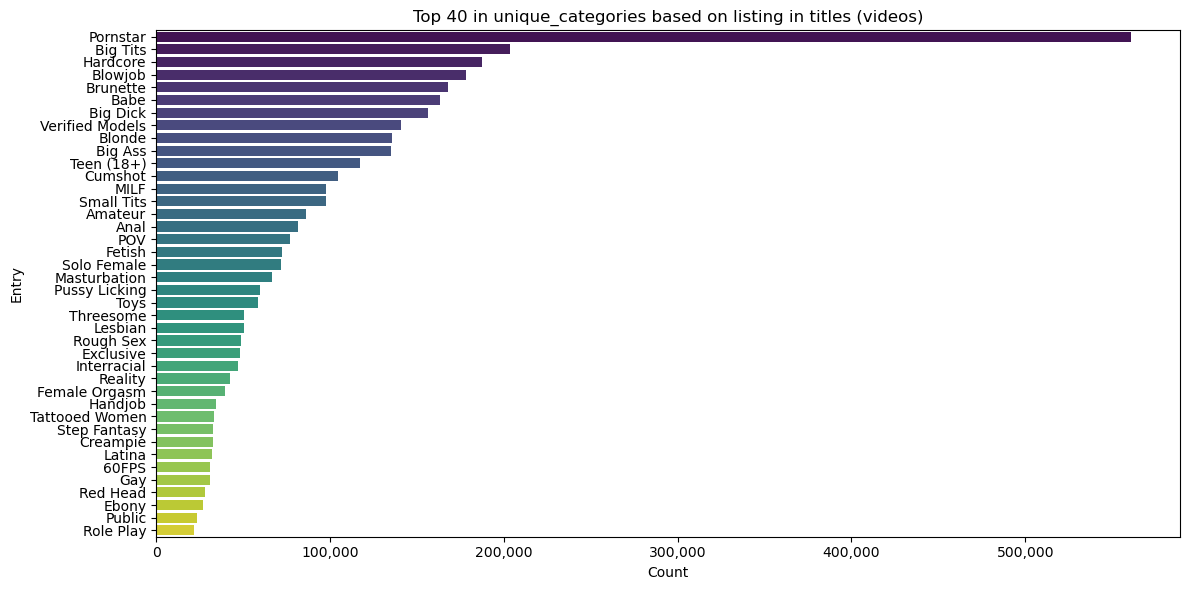

In [26]:
# Iterate through columns and display chart for each column (version_1)
for column in df_unique_content.columns:
    get_top_n_entries_by_encounter_and_create_barchart_v_1(df_unique_content[column])

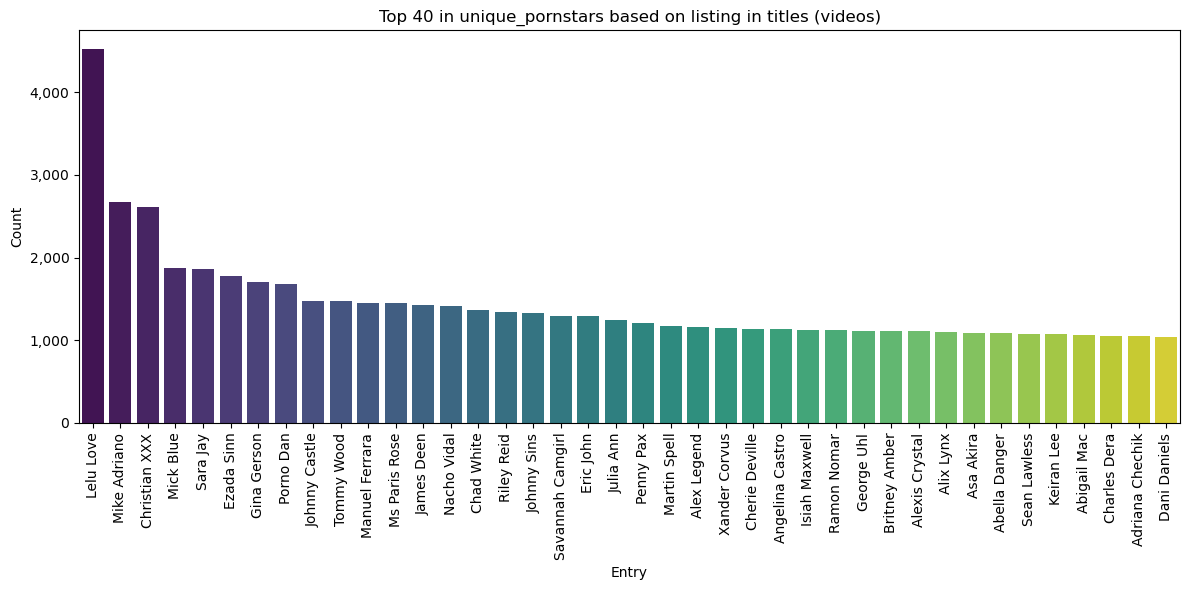

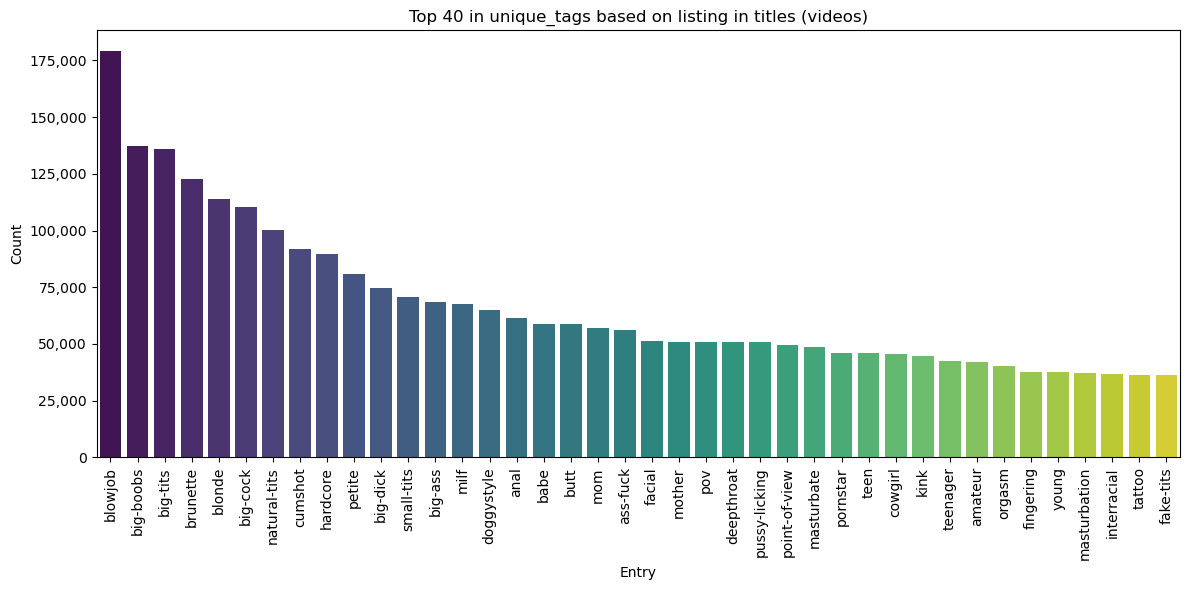

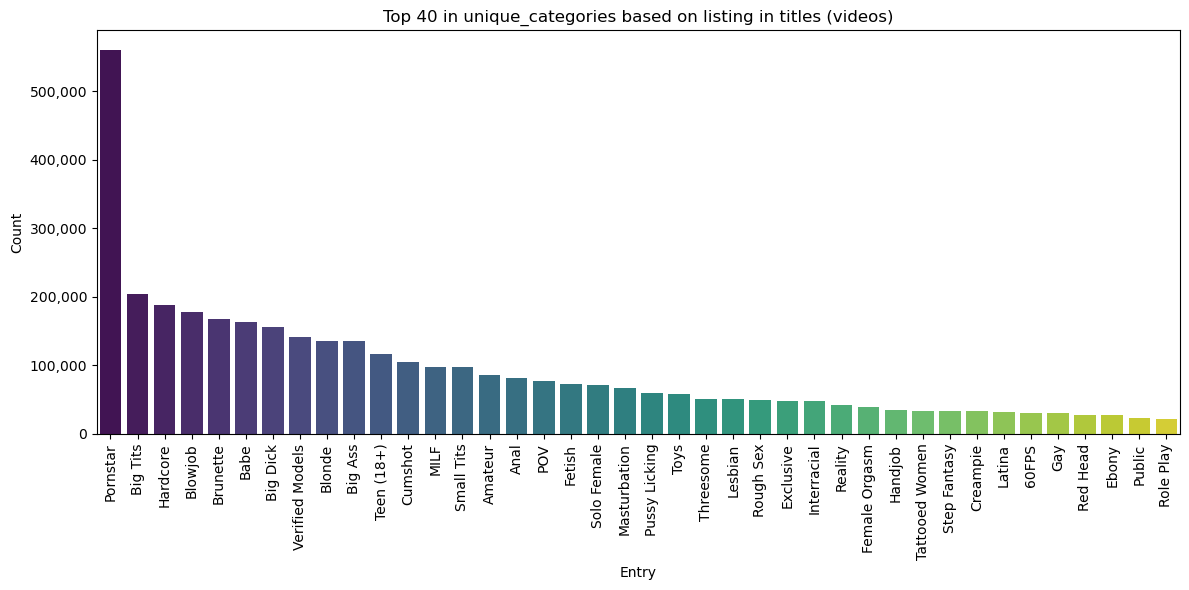

In [27]:
# Iterate through columns and display chart for each column (version_2)
for column in df_unique_content.columns:
    get_top_n_entries_by_encounter_and_create_barchart_v_2(df_unique_content[column])

In [28]:
# Now: examine the Top 40 based on cumulative views

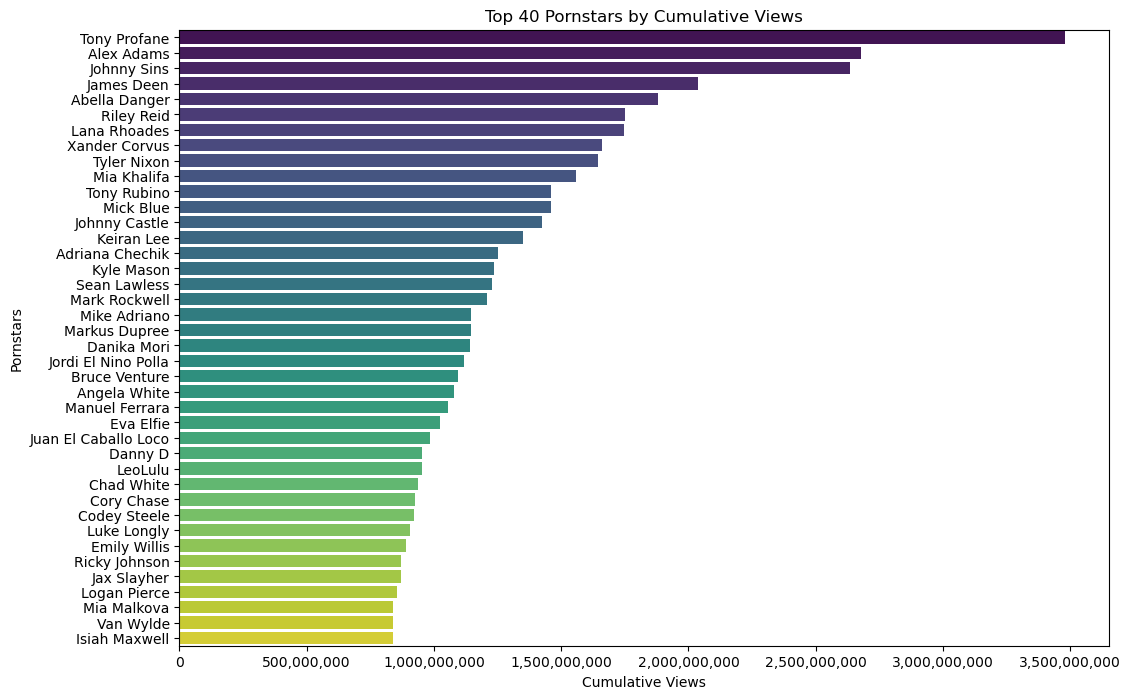

In [29]:
# Select Top 40 pornstars by cumulative views
top_n_pornstars = cumulative_views_by_pornstar.head(40)

# Create barchart
plt.figure(figsize = (12, 8))
ax = sns.barplot(x = "views", y = "unique_pornstars", data = top_n_pornstars, palette = "viridis")

# Custom chart settings
plt.title("Top 40 Pornstars by Cumulative Views")
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x)))
plt.xlabel("Cumulative Views")
plt.ylabel("Pornstars")
plt.show()

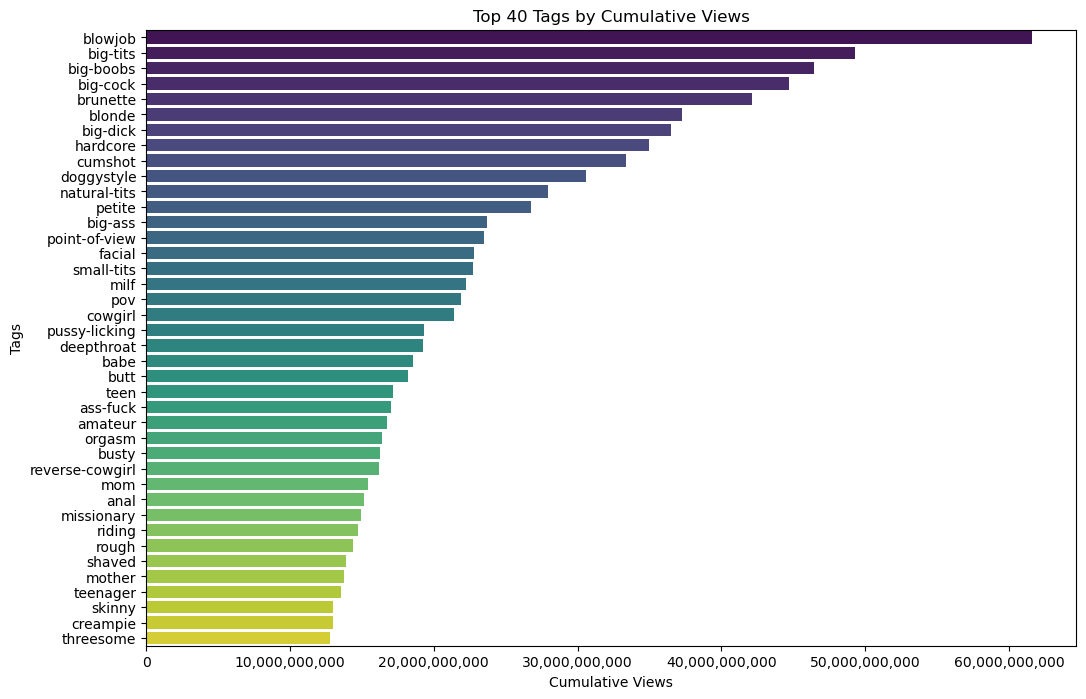

In [30]:
# Select Top 40 tags by cumulative views
top_n_tags = cumulative_views_by_tags.head(40)

# Create barchart
plt.figure(figsize = (12, 8))
ax = sns.barplot(x = "views", y = "unique_tags", data = top_n_tags, palette = "viridis")

# Custom chart settings
plt.title("Top 40 Tags by Cumulative Views")
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x)))
plt.xlabel("Cumulative Views")
plt.ylabel("Tags")
plt.show()

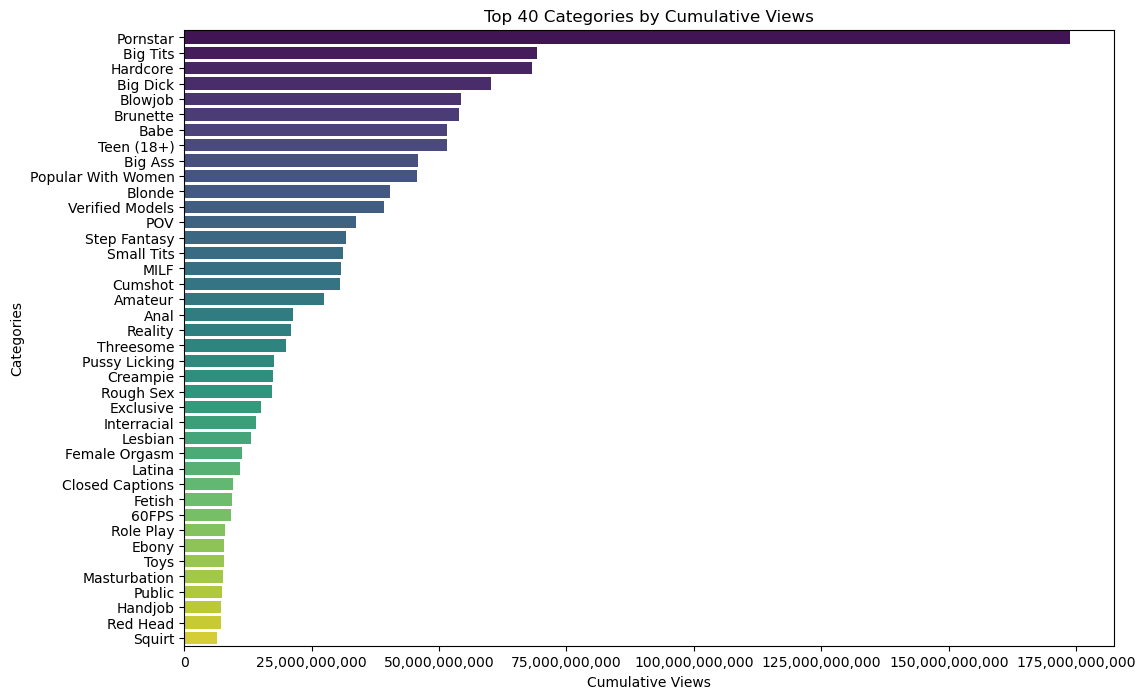

In [31]:
# Select Top 40 categories by cumulative views
top_n_cat = cumulative_views_by_cat.head(40)

# Create barchart
plt.figure(figsize = (12, 8))
ax = sns.barplot(x = "views", y = "unique_categories", data = top_n_cat, palette = "viridis")

# Custom chart settings
plt.title("Top 40 Categories by Cumulative Views")
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x)))
plt.xlabel("Cumulative Views")
plt.ylabel("Categories")
plt.show()